In [1]:
import pandas as pd

In [2]:
data = {
    "1 ensemble": {'md_counts':1,
                   'node_counts': 64,
                  'durations': {"unit.000000":828,
"unit.000001":699,
"unit.000002":36,
"unit.000003":695,
}},
    "4 ensembles": {'md_counts':4,
                    'node_counts': 256,
                    'durations': {
                        "unit.000000":828,
                        "unit.000001":832,
                        "unit.000002":829,
                        "unit.000003":836,
                        "unit.000004":1288,
                        "unit.000005":48,
                        "unit.000006":730,
                    }},
    "8 ensembles": {"md_counts":8,
                    'node_counts': 512,
                   'durations':{"unit.000000":828,
"unit.000001":828,
"unit.000002":833,
"unit.000003":827,
"unit.000004":829,
"unit.000005":830,
"unit.000006":830,
"unit.000007":837,
"unit.000008":3460,
"unit.000009":49,
"unit.000010":6,
}},
"16 ensembles": {"md_counts": 16,
                 'node_counts': 1024,
                'durations': {"unit.000000":829,
"unit.000001":828,
"unit.000002":826,
"unit.000003":827,
"unit.000004":1661,
"unit.000005":1655,
"unit.000006":1653,
"unit.000007":1654,
"unit.000008":1654,
"unit.000009":1653,
"unit.000010":1651,
"unit.000011":1649,
"unit.000012":1654,
"unit.000013":1650,
"unit.000014":1656,
"unit.000015":1651,
"unit.000016":3466,
"unit.000017":78,
"unit.000018":9,
}}}

In [3]:
mdruns = []
aggregations = []
aaes = []
outliers = []
for k, v in data.items():
    md_cnt = v['md_counts']
    avg = []
    aggregation = aae = outlier = 0 
    for k2, v2 in v['durations'].items():
        if md_cnt > 0:
            avg.append(v2)
        elif md_cnt == 0:
            aggregation = v2
        elif md_cnt == -1:   
            aae = v2
        else:
            outlier = v2
        md_cnt -= 1
    mdruns.append(sum(avg)//len(avg))
    aggregations.append(aggregation)
    aaes.append(aae)
    outliers.append(outlier)

In [4]:
df = pd.DataFrame({"NAMD":mdruns, 
                  "Aggregation":aggregations,
                  "Training": aaes,
                  "Outlier": outliers},
                 index = data.keys())

,NAMD,Aggregation,Training,Outlier
1 ensemble,828,699,36,695
4 ensembles,831,1288,48,730
8 ensembles,830,3460,49,6
16 ensembles,1446,3466,78,9


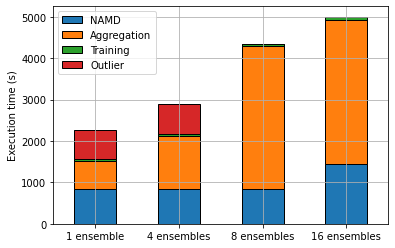

In [5]:
ax=df.plot.bar(stacked=True, rot=0,edgecolor='black', grid=True)
ax.set_ylabel('Execution time (s)')
df

* 8 and 16 ensembles do not have outlier data
* NAMD runs on 16 ensembles show 1.7x overhead
